<a href="https://colab.research.google.com/github/j-min/VPGen/blob/main/VPGen_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demo for VPGEN: Step-by-Step Text-to-Image Generation with Interpretable Visual Programming

as described in the paper:
["Visual Programming for Text-to-Image Generation and Evaluation"](https://vp-t2i.github.io/)

Code Author: Jaemin Cho

You would need Colab Pro or Pro+ to run Vicuna 13B inference (taking around 35GB CPU RAM).

In [ ]:
#@title Check GPU
!nvidia-smi

Tue Jul 25 04:46:49 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    51W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#@title Download Vicuna and LoRA weights

print("Installing HF hub")
!pip install -q --upgrade huggingface_hub

print("Downloading Vicuna13B weights")

from huggingface_hub import snapshot_download
snapshot_download(repo_id="j-min/vicuna-13b-v0-merged",
                  repo_type="model",
                  local_dir="/content/vicuna_13b_checkpoint",
                  force_download=True,
)

print("Downloading LoRA weights")

from huggingface_hub import hf_hub_download

for filename in ['adapter_config.json', 'adapter_model.bin']:
  hf_hub_download(repo_id="j-min/VPGen",
                  filename=filename,
                  subfolder="vicuna13B_GPU4_flickr30k_coco_paintskills_epoch2_mbatch32_lora16_cutoff256",
                  local_dir="/content/lora_checkpoint/",
  )

Installing HF hub
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.1 MB/s eta 0:00:00


Fetching 10 files:   0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
#@title Clone VPGen Code

!git clone https://github.com/j-min/VPGen
!cd /content/VPGen && pip install -q -r requirements.txt

Cloning into 'VPGen'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 23 (delta 4), reused 22 (delta 3), pack-reused 0
Receiving objects: 100% (23/23), 5.47 MiB | 5.64 MiB/s, done.
Resolving deltas: 100% (4/4), done.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 10.3

In [ ]:
#@title Create prompt input

input_prompt = "three dogs" #@param ["three dogs"] {allow-input: true}

input_prompt_data = {
    "custom": [
        input_prompt
    ]
}
import json
with open("/content/input_data.json", 'w') as f:
  json.dump(input_prompt_data, f)

In [ ]:
#@title Run text2layout inference w/ Vicuna 13B + LoRA (taking around 35GB of CPU memory)

base_model = "/content/vicuna_13b_checkpoint" #@param {type:"string"}
lora_model = '/content/lora_checkpoint/vicuna13B_GPU4_flickr30k_coco_paintskills_epoch2_mbatch32_lora16_cutoff256' #@param {type:"string"}
llm_device = "cuda:0" #@param {type:"string"}
data_path = "/content/input_data.json" #@param {type:"string"}
layout_dump_path = "/content/layout_output.json" #@param {type:"string"}

!cd /content/VPGen && python text2layout_inference.py \
	--base_model {base_model} \
	--lora_model {lora_model} \
	--llm_device {llm_device} \
	--data_path {data_path} \
	--layout_dump_path {layout_dump_path} \
	--data 'custom'


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/usr/local/lib/python3.10/dist-packages/cv2/../../lib64')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: /usr/local/lib/python3.10/dist-packages/cv2/../../lib64:/usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/

In [ ]:
#@title Install GLIGEN (diffusers)

!cd /content && git clone https://github.com/gligen/diffusers gligen_diffusers
!cd /content/gligen_diffusers && pip install -q -e .

Cloning into 'gligen_diffusers'...
remote: Enumerating objects: 18867, done.
remote: Total 18867 (delta 0), reused 0 (delta 0), pack-reused 18867
Receiving objects: 100% (18867/18867), 16.09 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (13615/13615), done.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done


In [ ]:
#@title Generate Images with GLIGEN

model='gligen'
layout_path = '/content/layout_output.json' #@param {type:"string"}
image_dump_dir = '/content/image_outputs' #@param {type:"string"}
layout_image_dump_dir = '/content/layout_image_outputs' #@param {type:"string"}

# Run inference
!cd /content/VPGen && python inference_images.py \
    --model {model} \
    --layout_path {layout_path} \
    --image_dump_dir {image_dump_dir} \
    --layout_image_dump_dir {layout_image_dump_dir}



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/ma

prompt: three dogs
filename: /content/layout_image_outputs/0.png


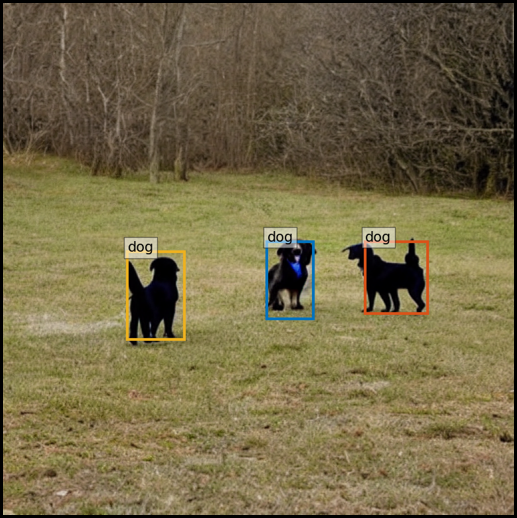

In [ ]:
#@title Show generated image

print(f"prompt: {input_prompt}")

from IPython.display import Image

filename = f'{layout_image_dump_dir}/0.png'

print(f"filename: {filename}")
Image(filename=filename)